In this notebook, we will
*  fetch Metadata from Sentinel-1.
*  use the Metadata to download the image(s). 
*  open, calibrate and speckle filter the image and 
* only take out the subsets that we need...

The reason why I preper this chronological order, is that I can use an external dataset to dictate which images to use. 


if you can use it, remember to see the License ;)


# Imports

In [2]:
from sentinel_1_python.metadata import Sentinel_metadata
from sentinel_1_python.visualize import show_cross_pol_function
from sentinel_1_python.download import Satellite_download
from sentinel_1_python.pre_process_grd import s1_load
import os, glob

## Metadata 

In [3]:
met = Sentinel_metadata()

In [17]:
lon , lat = 36.047139, -5.238601
met.area([lat-0.01,lat+0.01,lon-0.01,lon+0.01])
met.get_metadata(sensor='s1_grd',start_data='20150101',end_date='20191010')

Querying products: 100%|██████████| 758/758 [00:06<00:00, 102.63product/s]
/opt/homebrew/Caskroom/miniforge/base/envs/env_rfi/lib/python3.9/site-packages/sentinel_1_python/metadata/_utilities.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon = df.geometry.to_crs(4326).centroid.x.values
/opt/homebrew/Caskroom/miniforge/base/envs/env_rfi/lib/python3.9/site-packages/sentinel_1_python/metadata/_utilities.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat = df.geometry.to_crs(4326).centroid.y.values


In [24]:
hh_hv = met.products_df[met.products_df.polarisationmode.isin(['HH HV'])]

In [ ]:
met.plot_image_areas() # Showing extent of images

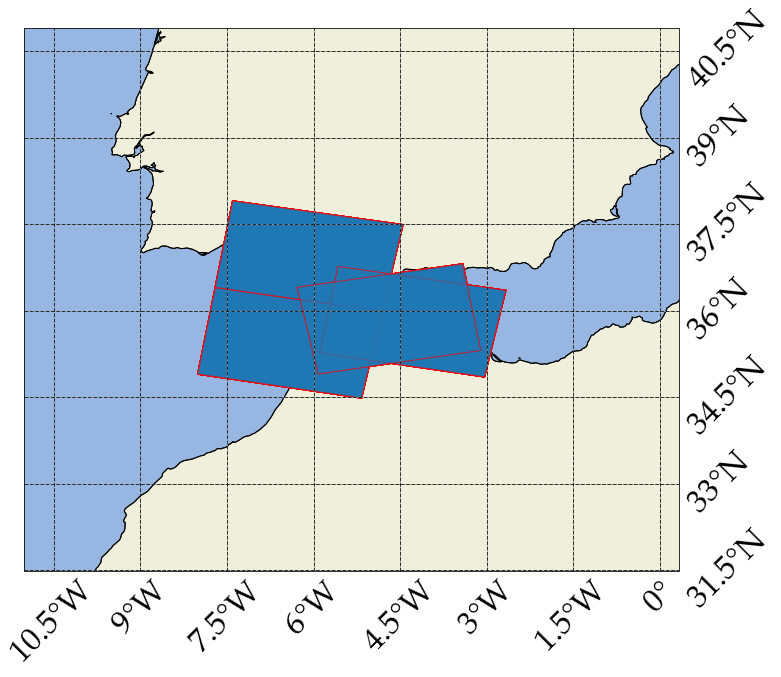

In [8]:
met.iw() #filer so we only have IW


In [5]:
print(met.products_df.mgcs.unique()[5])
df_mgrs= met.products_df[met.products_df.mgcs==met.products_df.mgcs.unique()[5]]

35VNE


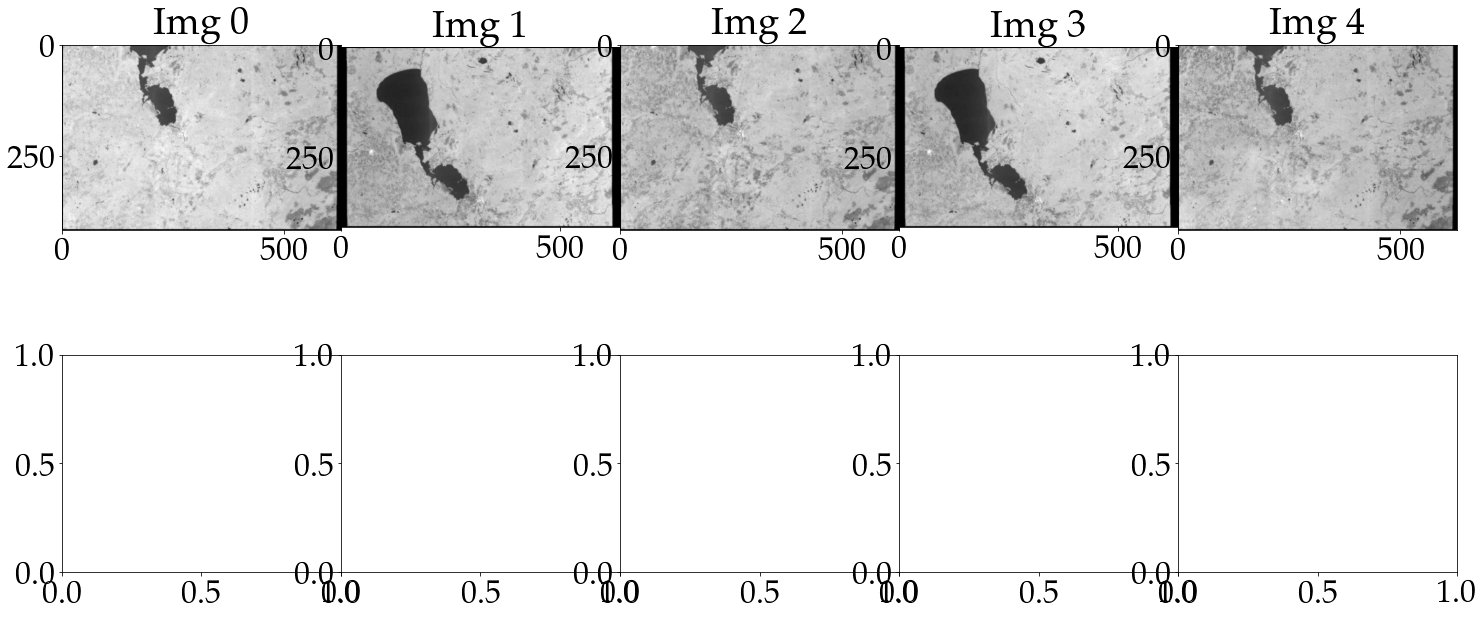

In [7]:
show_cross_pol_function(df_mgrs,5,username=os.getenv('COPERNICUS_HUP_USERNAME'),password=os.getenv('COPERNICUS_HUP_PASSWORD'))

## Download 

In [25]:
hh_hv

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,productclass,polarisationmode,acquisitiontype,status,size,identifier,uuid,processed,geometry,mgcs
6929c96c-c085-4a34-8685-0eb14c9f7557,S1B_IW_GRDH_1SDH_20160929T062618_20160929T0626...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-09-29T06:26:18.546Z, Instrument: SA...",false,2016-09-29 06:26:18.546,2016-09-29 06:26:47.561,2016-09-29 18:00:32.652,15759,...,S,HH HV,NOMINAL,ARCHIVED,1.83 GB,S1B_IW_GRDH_1SDH_20160929T062618_20160929T0626...,6929c96c-c085-4a34-8685-0eb14c9f7557,F,"POLYGON ((-4.88453 35.73735, -7.64239 36.13424...",29SQA
3b2a7640-d334-4771-8d56-d1f499b17588,S1A_EW_GRDM_1SDH_20150102T181732_20150102T1818...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-01-02T18:17:32.77Z, Instrument: SAR...",false,2015-01-02 18:17:32.770,2015-01-02 18:18:17.986,2015-02-22 06:20:52.109,19706,...,S,HH HV,NOMINAL,ARCHIVED,304 MB,S1A_EW_GRDM_1SDH_20150102T181732_20150102T1818...,3b2a7640-d334-4771-8d56-d1f499b17588,NaN,"POLYGON ((-8.06838 37.04323, -3.46718 37.71766...",30STE
b9624bd9-257c-4f31-bb02-af51b425ea89,S1A_EW_GRDM_1SDH_20150103T061845_20150103T0619...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-01-03T06:18:45.246Z, Instrument: SA...",false,2015-01-03 06:18:45.246,2015-01-03 06:19:30.470,2015-02-22 01:42:06.985,19754,...,S,HH HV,NOMINAL,ARCHIVED,304 MB,S1A_EW_GRDM_1SDH_20150103T061845_20150103T0619...,b9624bd9-257c-4f31-bb02-af51b425ea89,NaN,"POLYGON ((-1.76594 33.74317, -6.18255 34.41989...",30SVE
f99f763c-ac2e-4328-b99d-230a9234cd8c,S1A_EW_GRDM_1SDH_20150108T062650_20150108T0627...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-01-08T06:26:50.319Z, Instrument: SA...",false,2015-01-08 06:26:50.319,2015-01-08 06:27:44.647,2015-01-08 20:42:35.596,20182,...,S,HH HV,NOMINAL,ARCHIVED,366 MB,S1A_EW_GRDM_1SDH_20150108T062650_20150108T0627...,f99f763c-ac2e-4328-b99d-230a9234cd8c,NaN,"POLYGON ((-3.83770 33.69131, -8.25057 34.36791...",30STE


In [27]:
hh_hv

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,productclass,polarisationmode,acquisitiontype,status,size,identifier,uuid,processed,geometry,mgcs
6929c96c-c085-4a34-8685-0eb14c9f7557,S1B_IW_GRDH_1SDH_20160929T062618_20160929T0626...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-09-29T06:26:18.546Z, Instrument: SA...",false,2016-09-29 06:26:18.546,2016-09-29 06:26:47.561,2016-09-29 18:00:32.652,15759,...,S,HH HV,NOMINAL,ARCHIVED,1.83 GB,S1B_IW_GRDH_1SDH_20160929T062618_20160929T0626...,6929c96c-c085-4a34-8685-0eb14c9f7557,F,"POLYGON ((-4.88453 35.73735, -7.64239 36.13424...",29SQA
3b2a7640-d334-4771-8d56-d1f499b17588,S1A_EW_GRDM_1SDH_20150102T181732_20150102T1818...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-01-02T18:17:32.77Z, Instrument: SAR...",false,2015-01-02 18:17:32.770,2015-01-02 18:18:17.986,2015-02-22 06:20:52.109,19706,...,S,HH HV,NOMINAL,ARCHIVED,304 MB,S1A_EW_GRDM_1SDH_20150102T181732_20150102T1818...,3b2a7640-d334-4771-8d56-d1f499b17588,NaN,"POLYGON ((-8.06838 37.04323, -3.46718 37.71766...",30STE
b9624bd9-257c-4f31-bb02-af51b425ea89,S1A_EW_GRDM_1SDH_20150103T061845_20150103T0619...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-01-03T06:18:45.246Z, Instrument: SA...",false,2015-01-03 06:18:45.246,2015-01-03 06:19:30.470,2015-02-22 01:42:06.985,19754,...,S,HH HV,NOMINAL,ARCHIVED,304 MB,S1A_EW_GRDM_1SDH_20150103T061845_20150103T0619...,b9624bd9-257c-4f31-bb02-af51b425ea89,NaN,"POLYGON ((-1.76594 33.74317, -6.18255 34.41989...",30SVE
f99f763c-ac2e-4328-b99d-230a9234cd8c,S1A_EW_GRDM_1SDH_20150108T062650_20150108T0627...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-01-08T06:26:50.319Z, Instrument: SA...",false,2015-01-08 06:26:50.319,2015-01-08 06:27:44.647,2015-01-08 20:42:35.596,20182,...,S,HH HV,NOMINAL,ARCHIVED,366 MB,S1A_EW_GRDM_1SDH_20150108T062650_20150108T0627...,f99f763c-ac2e-4328-b99d-230a9234cd8c,NaN,"POLYGON ((-3.83770 33.69131, -8.25057 34.36791...",30STE


In [26]:
folder = f'/Users/kaaso/Documents/phd/data/Sentinel_1/hh_hv_gibraltar'
with Satellite_download(hh_hv) as dwl:
    os.makedirs(folder, exist_ok=True)
    #save metadata
    dwl.products_df.to_pickle(f'{folder}/grd_dataframe.pkl')
    #download the thumbnails
    dwl.download_thumbnails(folder=f'{folder}/grd_thumbnails') 
    #download the entire image (grd) for some.. 
    dwl.download_sentinel_1(f'{folder}/grd')


 > Command line argument '--ip=127.0.0.1' makes no sense, ignoring.
 > Command line argument '--stdin=9003' makes no sense, ignoring.
 > Command line argument '--control=9001' makes no sense, ignoring.
 > Command line argument '--hb=9000' makes no sense, ignoring.
 > Command line argument '--Session.signature_scheme="hmac-sha256"' makes no sense, ignoring.
 > Command line argument '--Session.key=b"10f85914-d334-45a4-80fa-fbd6ed80fffa"' makes no sense, ignoring.
 > Command line argument '--shell=9002' makes no sense, ignoring.
 > Command line argument '--transport="tcp"' makes no sense, ignoring.
 > Command line argument '--iopub=9004' makes no sense, ignoring.
 > Command line argument '--f=/Users/kaaso/Library/Jupyter/runtime/kernel-v2-2977GEjk9Qi49X2k.json' makes no sense, ignoring.
 > attempting to download https://urs.earthdata.nasa.gov/profile
 > Could not validate old cookie Jar
No existing URS cookie found, please enter Earthdata username & password:
(Credentials will not be stor

## Load and calibrate

In [4]:
image_paths = glob.glob(f'{os.getenv("raw_data_dir")}/*/*/*.SAFE')
image_paths

['../../data/raw/sweden_data/grd/S1A_IW_GRDH_1SDV_20221008T045943_20221008T050008_045346_056BF3_0954.SAFE']

### Load Image

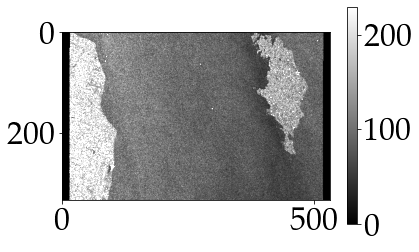

In [5]:
img = s1_load(image_paths[0])
img.simple_plot(band_index=0,stride=50)

### Radiometric calibration (really just dependant on incidence angle. Here gamma)

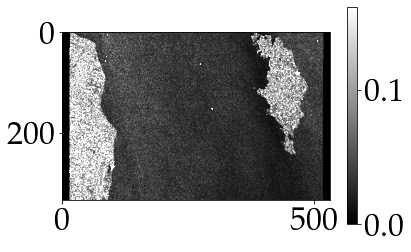

In [10]:
img =img.calibrate(mode='gamma') # could also use, e.g., 'sigma_0' 
img.simple_plot(band_index=0,stride=50)

It takes 130 seconds on my laptop to calibrate the entire image. 

### Speckle filtering.  Here the simplest, i.e., box filter

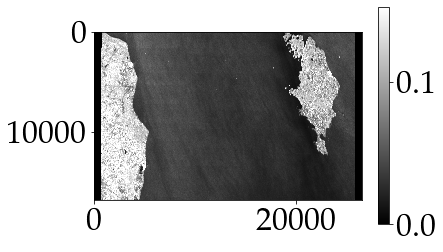

In [11]:
img = img.boxcar(5) #could easily make, e.g., a Lee filter..
img.simple_plot(band_index=0)

It takes 35 seconds on my laptop to perform box filerting on the entire image.

In [126]:
#import matplotlib.pyplot as plt
#diff = img.bands[1]-img_box.bands[1]
#plt.imshow(diff[::10,::10],cmap='gray',vmin=-0.001,vmax=0.001)
#plt.colorbar()

### Taking a subset

Now, lets say we know the position of, e.g., a ship (or another object) we might want to take that subset out:

In [12]:
indx = img.get_index(lat=57.0047,long=19.399)
print('index: ',indx)
#checking accuracy
print('coord: ',img.get_coordinate(indx[0],indx[1]))

index:  (9902, 15705)
coord:  (57.00469210530435, 19.39895965014322)


vh


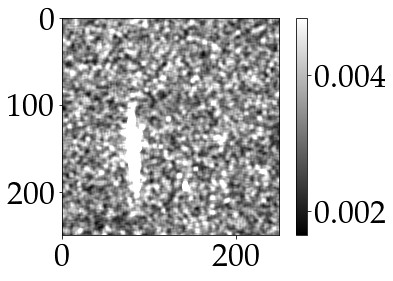

In [13]:
print('vh')
img[indx[0]-125:indx[0]+125,indx[1]-125:indx[1]+125].simple_plot(band_index=1)

vv


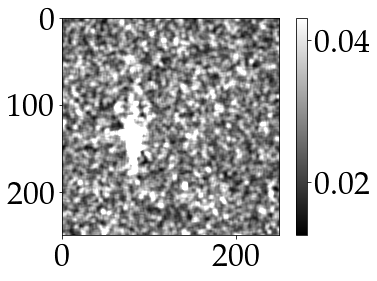

In [14]:
print('vv')
img[indx[0]-125:indx[0]+125,indx[1]-125:indx[1]+125].simple_plot(band_index=0)


In [15]:
subset = img[indx[0]-125:indx[0]+125,indx[1]-125:indx[1]+125]

In [16]:
subset

Mission: SENTINEL-1A 
 Bands: ['VV', 'VH']

In [17]:
subset.band_meta

[{'missionId': 'S1A',
  'productType': 'GRD',
  'polarisation': 'VV',
  'mode': 'IW',
  'swath': 'IW',
  'startTime': '2022-10-08T04:59:43.818129',
  'stopTime': '2022-10-08T05:00:08.816946',
  'absoluteOrbitNumber': '45346',
  'missionDataTakeId': '355315',
  'imageNumber': '001'},
 {'missionId': 'S1A',
  'productType': 'GRD',
  'polarisation': 'VH',
  'mode': 'IW',
  'swath': 'IW',
  'startTime': '2022-10-08T04:59:43.818129',
  'stopTime': '2022-10-08T05:00:08.816946',
  'absoluteOrbitNumber': '45346',
  'missionDataTakeId': '355315',
  'imageNumber': '002'}]

In [18]:
print(img.unit)

gamma
